# NOT Using ImageNet-1000
- ImageNet-1000 데이터셋 전부가 아닌 맨앞의 클래스 5개만 이용한 결과 (run_name: `2021-06-15-14-10-25_YOLOv1Pretrainer_LR0.000300_BS064_WORKERS16_EPOCHS200_GPU`)
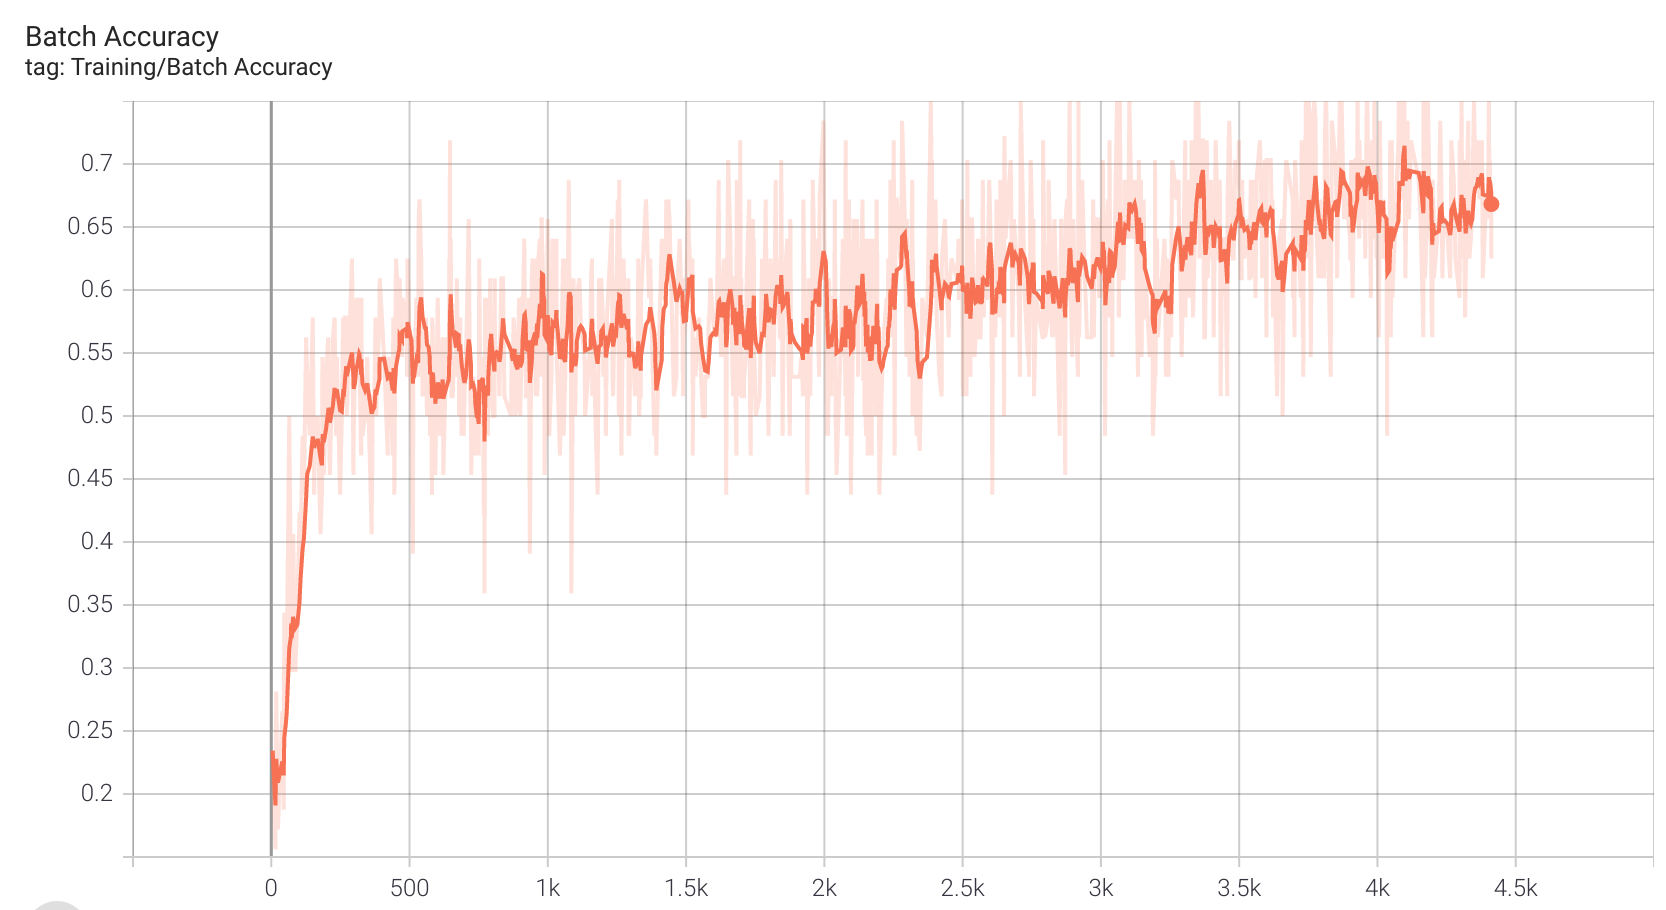
- Learning rate `0.003`을 이용하였음
- Max Accuracy: 0.7969, Epoch ~44에서 달성

# Not using ImageNet-1000 v2
- 이번에는 10개의 클래스만 이용한 결과 (run_name: `2021-06-15-14-29-31_TenClasses_LR0.000300_BS064_WORKERS16_EPOCHS200_GPU`)
- 동일하게 LR=`0.0003`을 이용하였음

## Loss
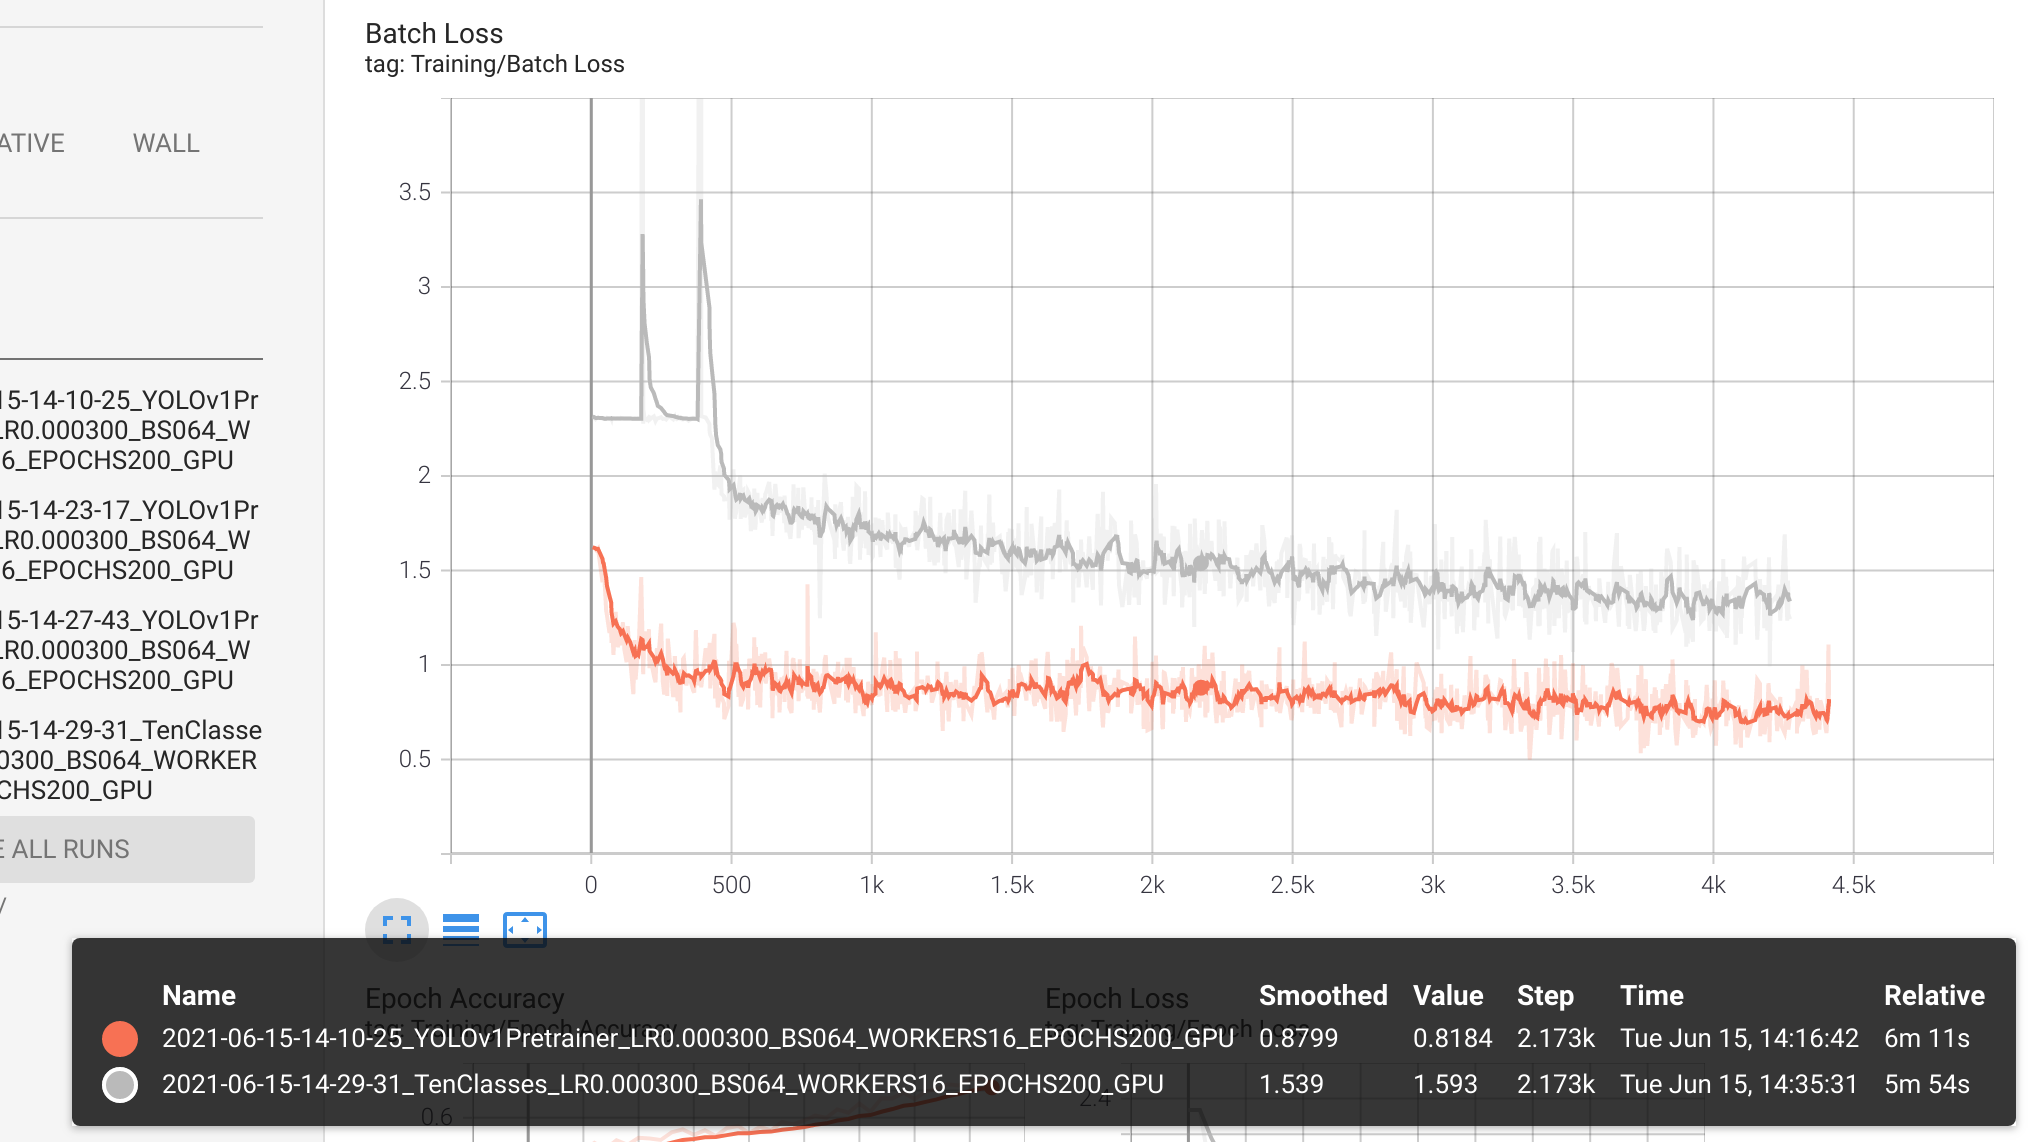
- 회색 부분에 해당하는 그래프임
- 초반부에 Flat한 부분 뒤로 ~500batch 뒤에 수렴하기 시작함

## Accuracy
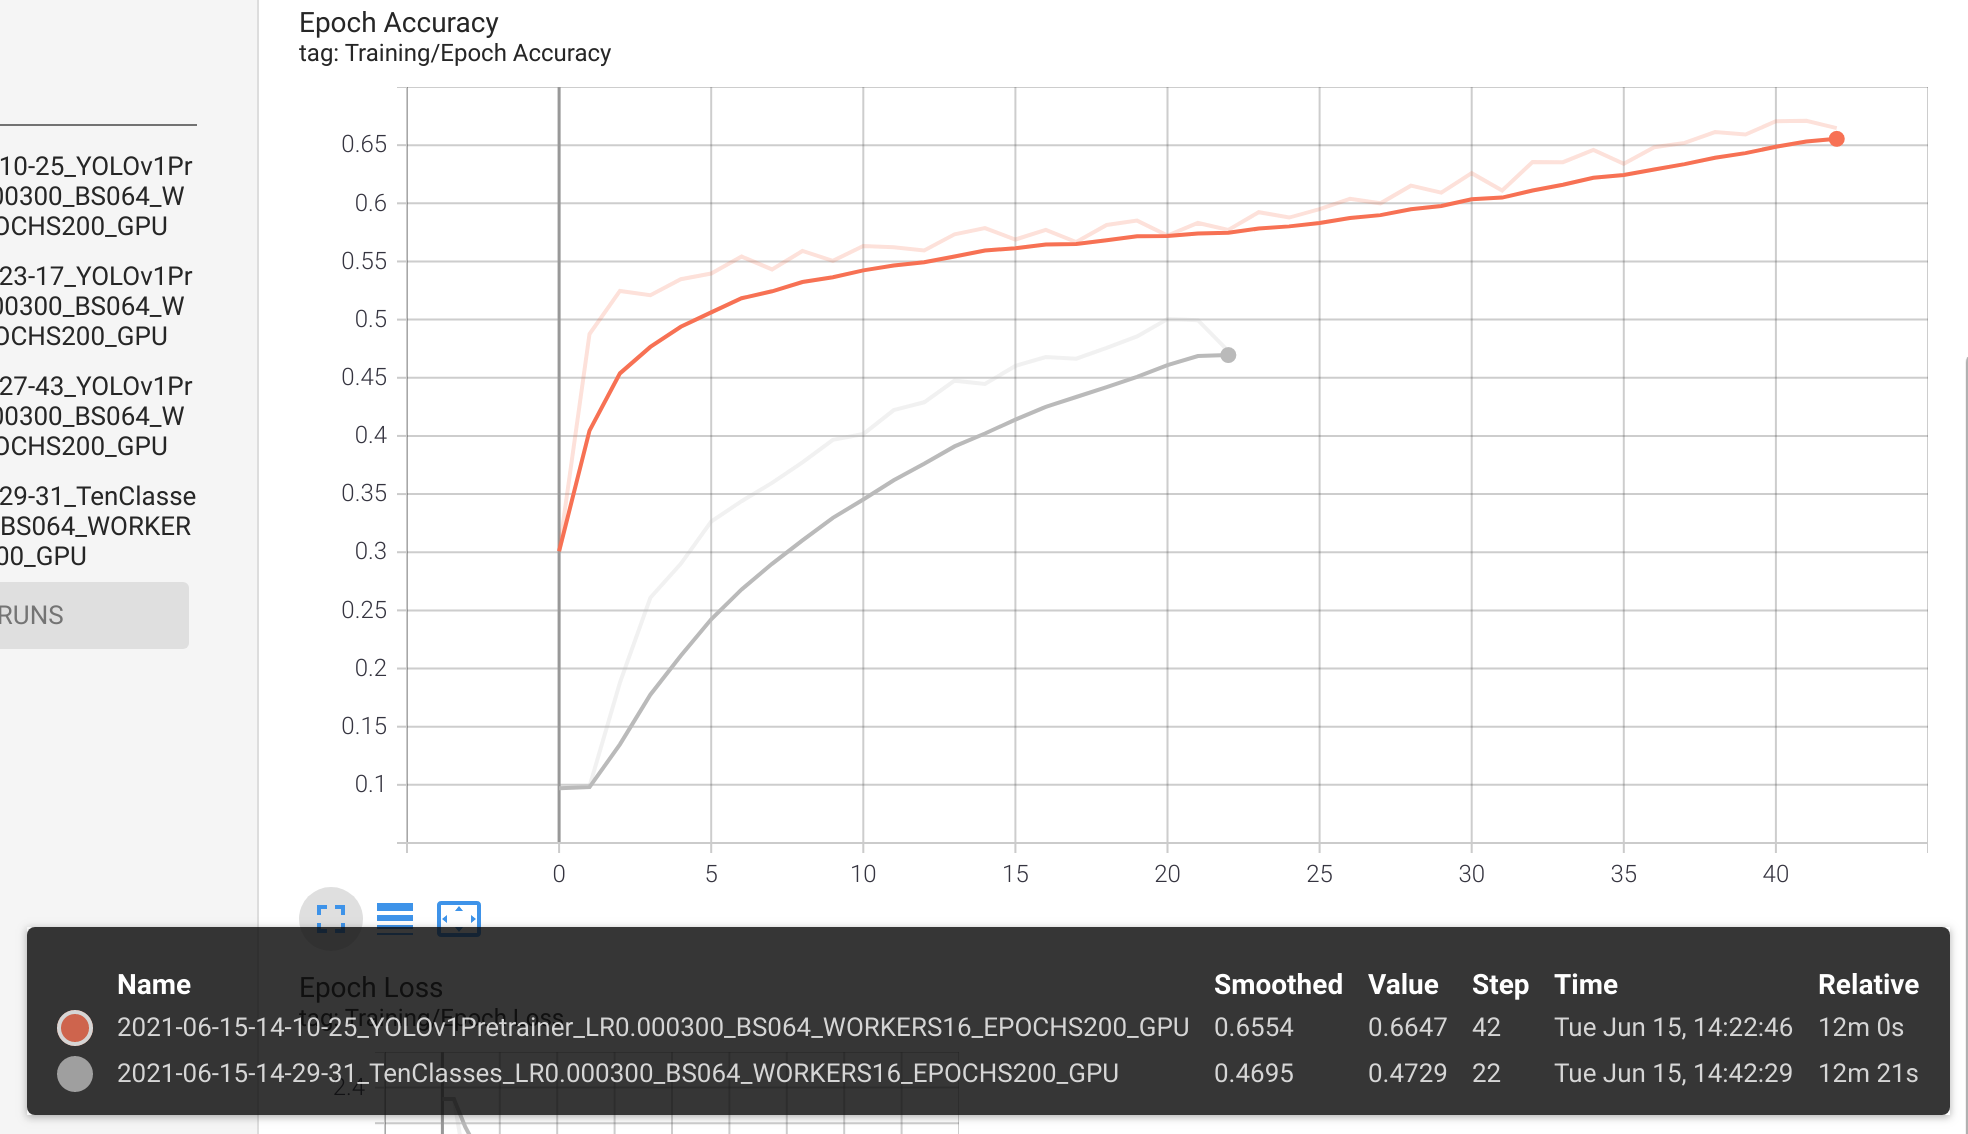
- 전체적으로 올라가고 있는 것을 확인할 수 있음 (25에폭 기준 0.5 달성)

# with AMP
- run_name: `2021-06-15-14-45-29_FiveClass-AMP_LR0.000300_BS064_WORKERS16_EPOCHS200_GPU`
- LR 0.0003, 5개 클래스 분류에서 AMP와 GradScaler를 활성화 한 뒤 학습 진행해봄
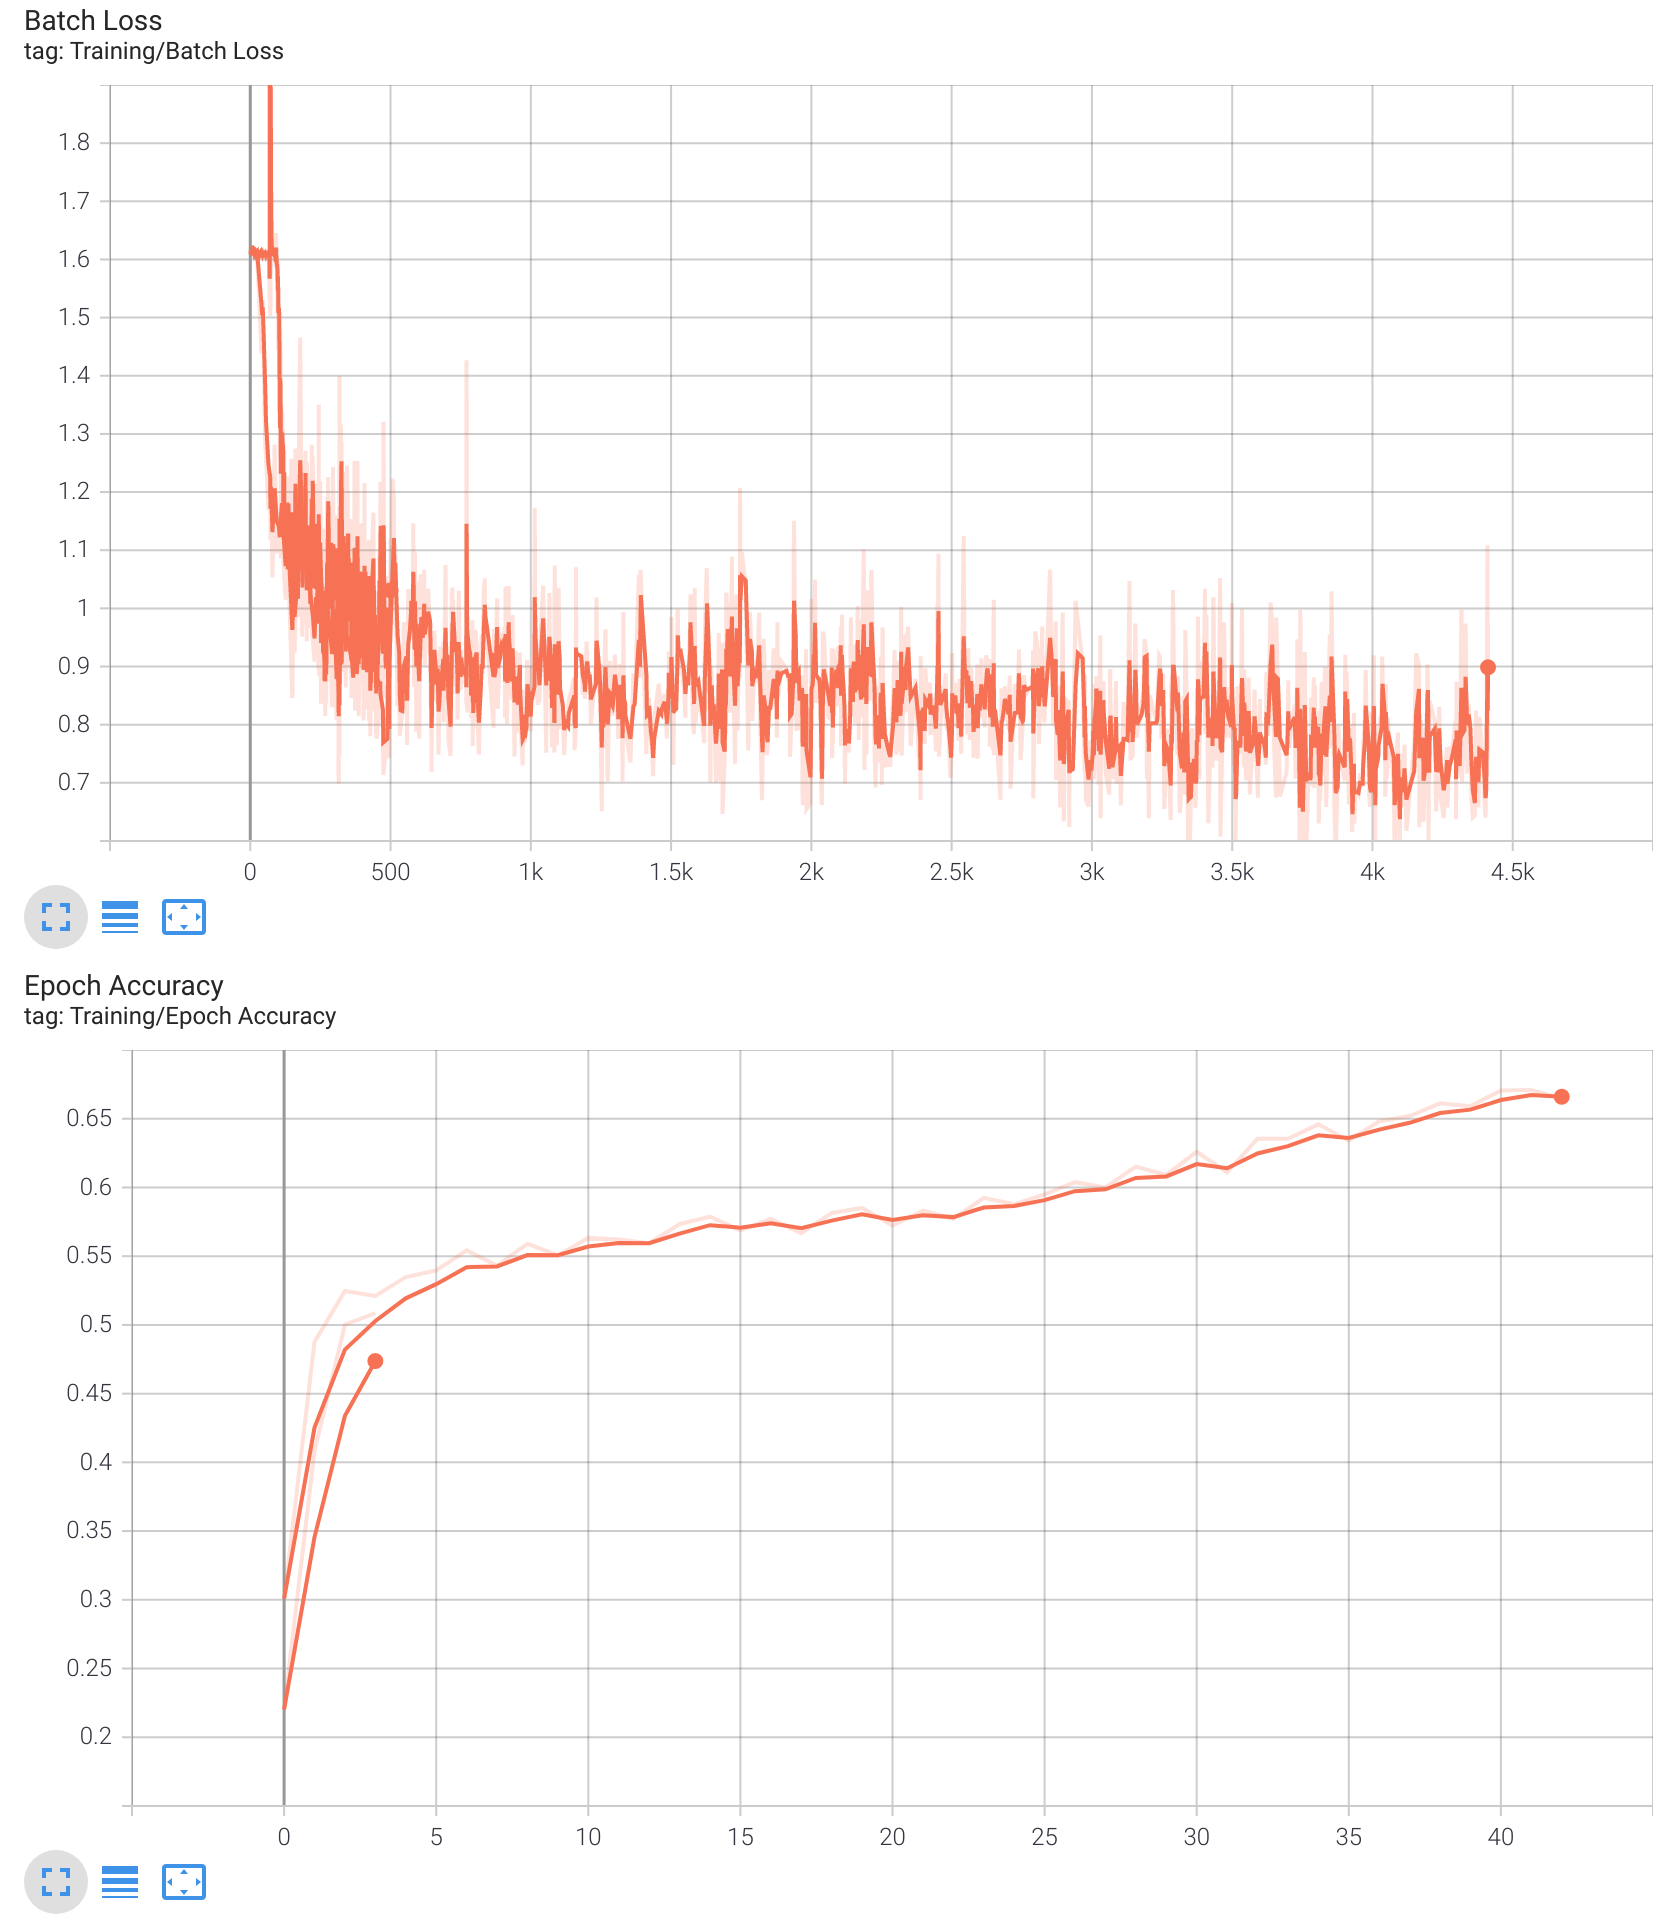
- 결론: 일단 5개 클래스 분류에서는 두개 사이에 차이는 없는 듯함

# with AMP, 2nd try
- run_name: `2021-06-15-14-48-27_FiveClass-AMP_LR0.000300_BS064_WORKERS16_EPOCHS200_GPU`
- 같은 환경에서 10개 클래스 분류 문제로 바꿔서 학습해봄
- 한 에폭당 거의 40초정도로 상당히 빨라짐을 확인함
- 수렴이 비슷한 양상으로 진행됨
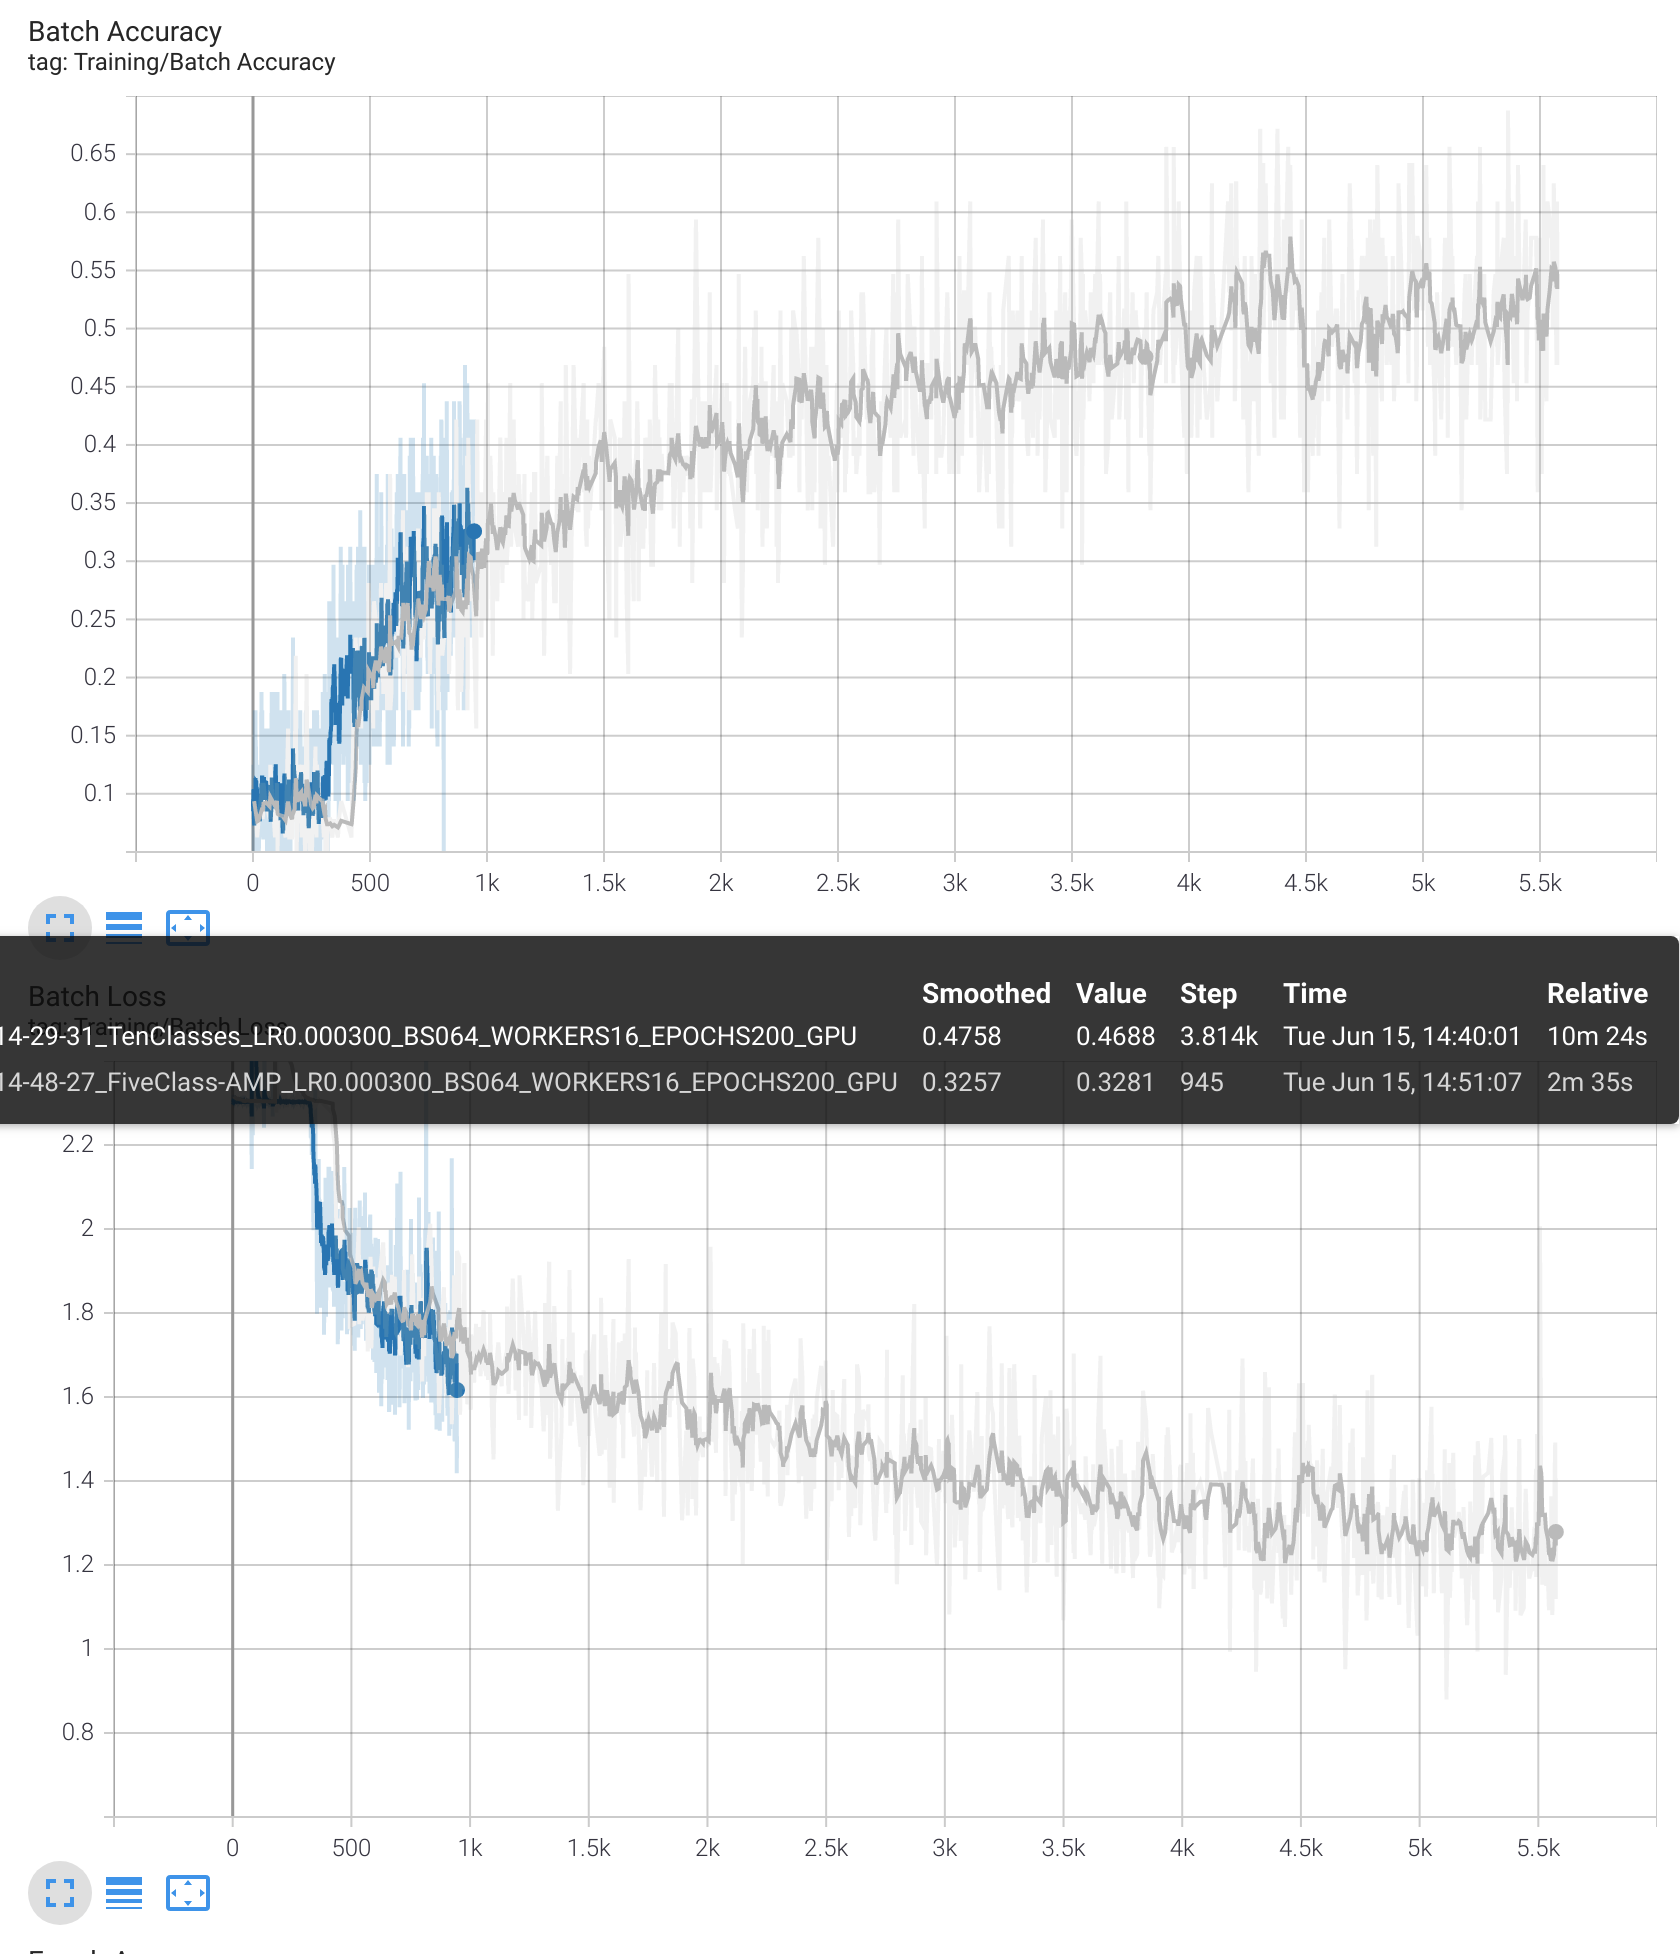
- 결론: 10개 클래스 분류에서도 두개 사이의 차이가 거의 없고 성능이 향상됨 (파란색이 AMP, 회색이 일반)


# with AMP!
- 이제 AMP를 적극적으로 활용해보자
- 이번에는 50개 클래스를 AMP와 LR=`0.0003`을 이용하여 시도해본다.
- run_name: `2021-06-15-14-53-15_FiveClass-AMP_LR0.000300_BS064_WORKERS16_EPOCHS200_GPU`
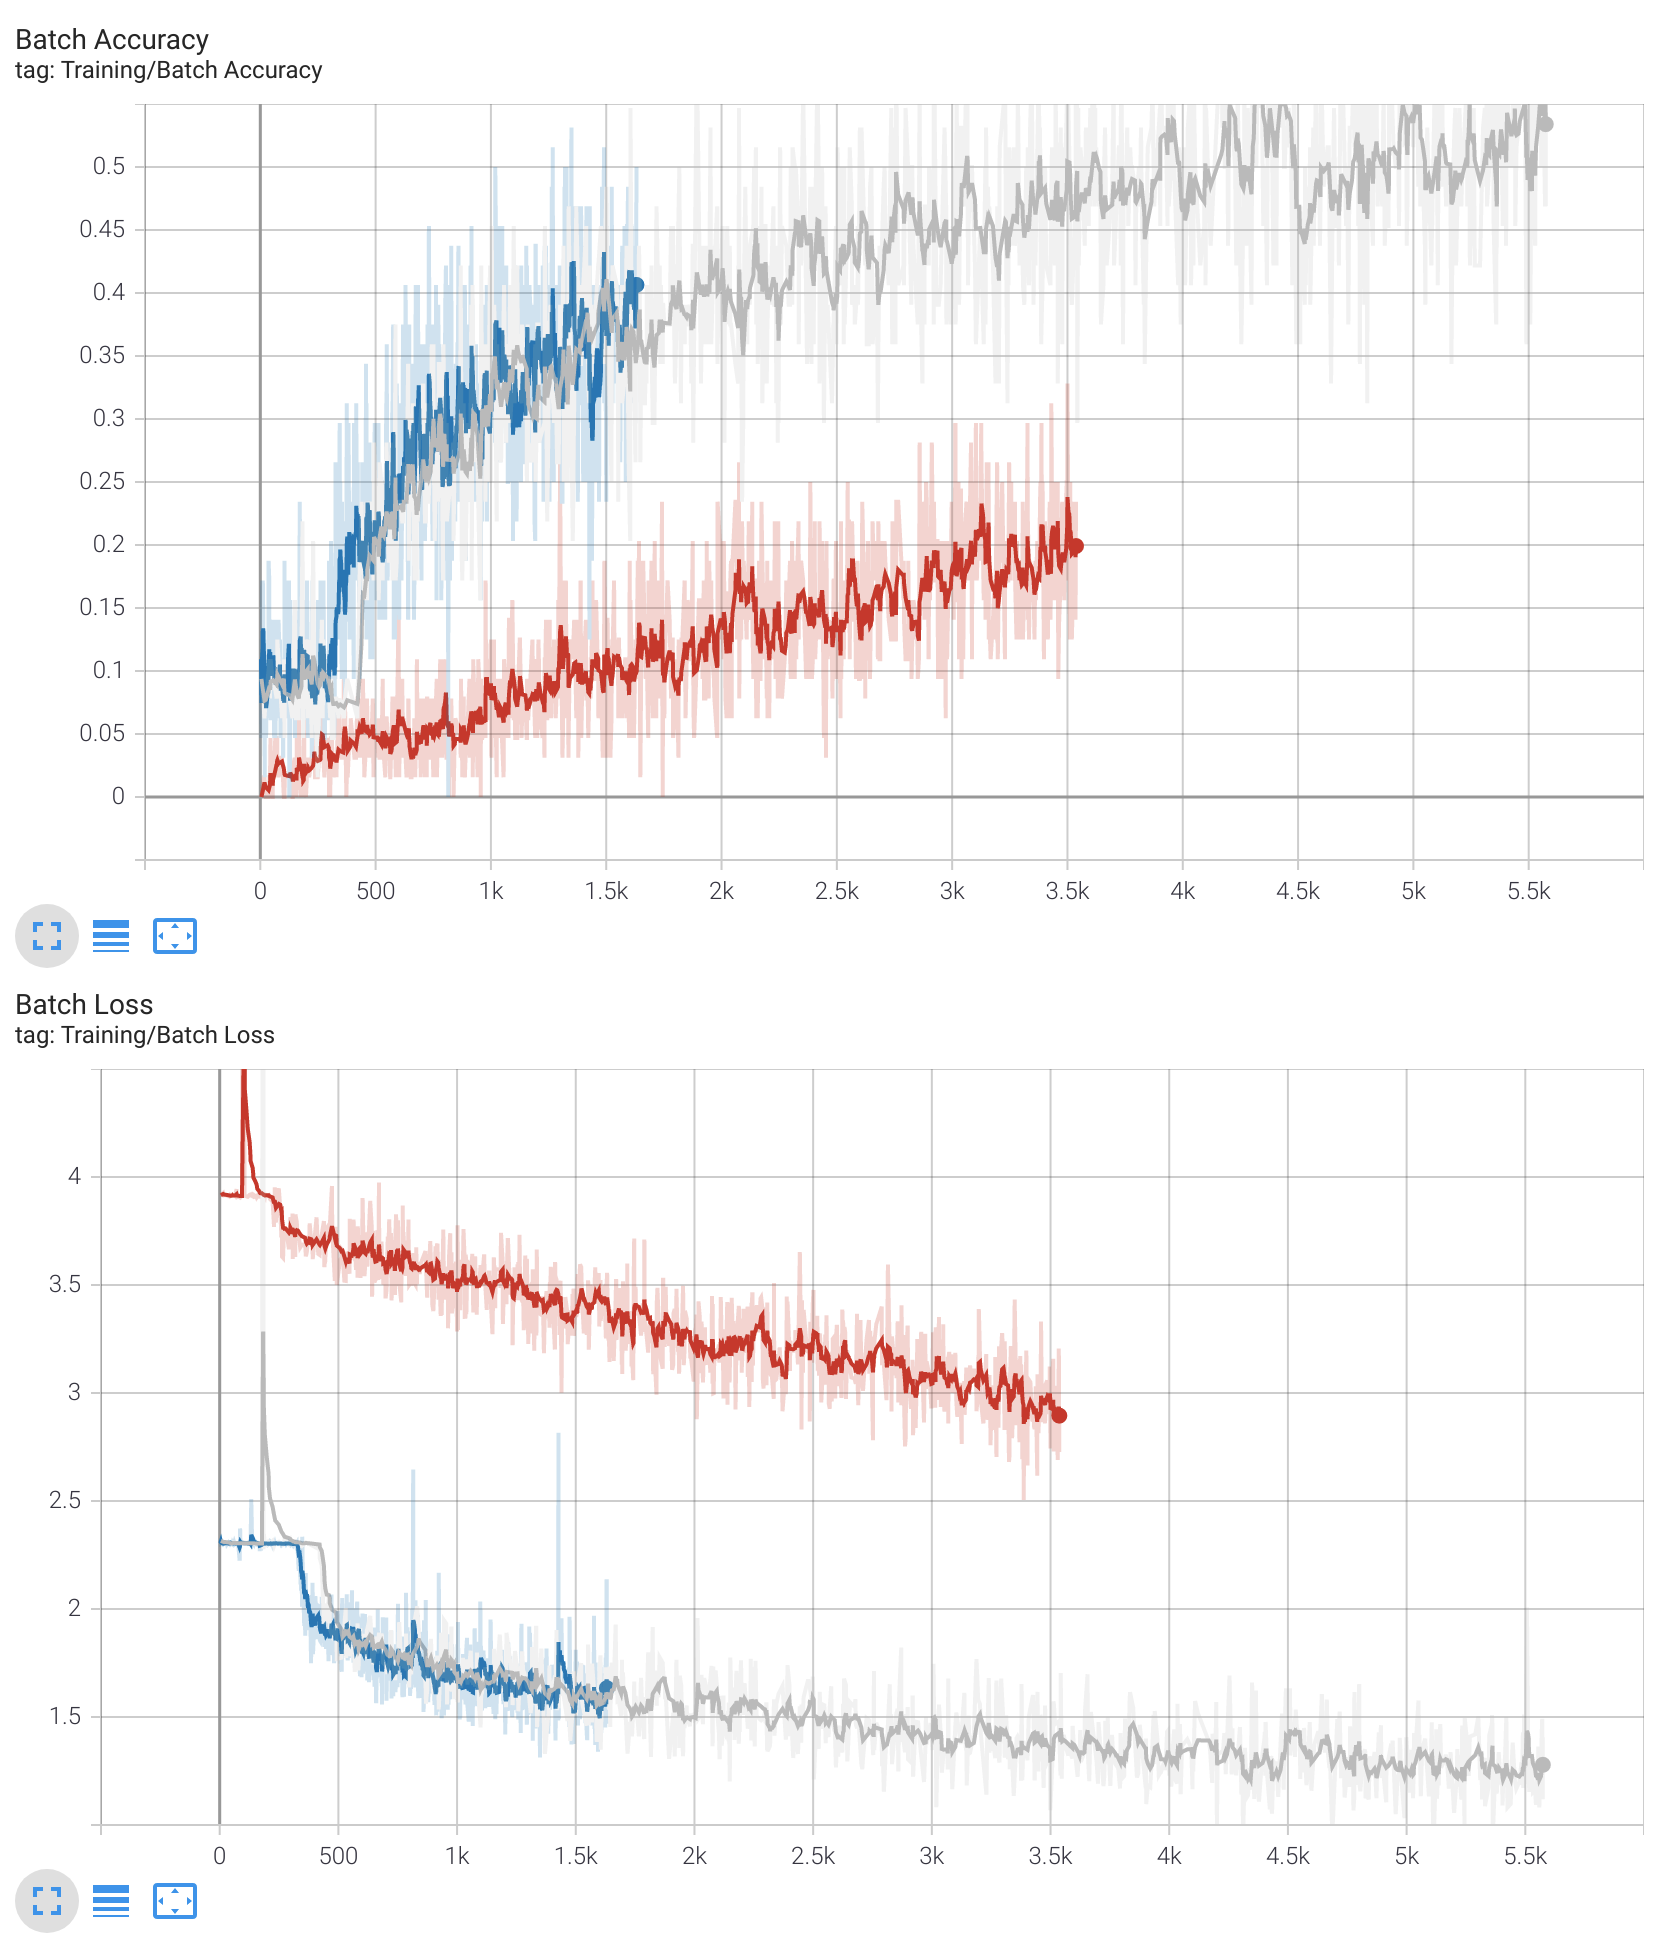
- 고동색 그래프가 착실히 떨어지는 것을 확인할 수 있음

## LR tuning
- 이제는 LR 크기를 늘릴 수 있는 여지를 확인해보도록 하겠음
- 지금은 LR=0.0003이지만 이걸 0.0001씩 늘려서 확인해봄

### lr=0.0004
- run_name: `2021-06-15-15-04-10_FiftyClass-LRTest_LR0.000400_BS064_WORKERS16_EPOCHS200_GPU`
- 시작점이 클래스 20개 기준으로 3.9 언저리이다. 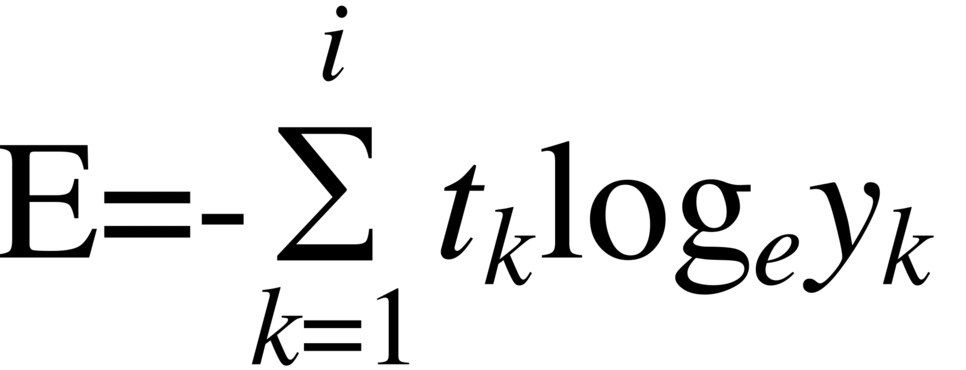
이는 CE Loss에서 모든 값이 동일할 경우 그 값을 모두 합친 값으로 나오기 때문이다.
- 그리고 이 시작점을 "넘어서는" 값들을 가질 경우는 Gradient explosion이라고 생각할 수 있을 것이다.
- lr=0.0004를 기점으로는 잘 학습이 되지 않는다. (Epoch 2가 끝날 때쯤 NaN이 떠서 죽어버렸다...)

- 결론: LR은 0.0003이 가장 적절한 것 같다.

# Full dataset training
- run_name: `2021-06-15-15-09-45_FullDataset_LR0.000300_BS064_WORKERS16_EPOCHS200_GPU`
- Loss 시작점: `6.911`, 약 5에폭 정도는 대기할 수 있을 듯하다.